# Prac 06.1

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Step 1

Load an image (any image that contains faces).

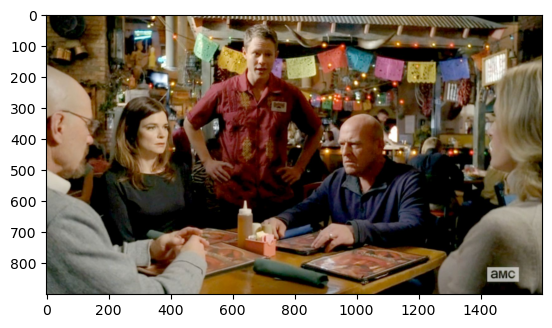

In [2]:
img = cv2.imread('../data/bb.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(img_gray)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

In [5]:
def convert_and_trim_bb(image, rect):

    startX = rect.left()
    startY = rect.top()
    endX = rect.right()
    endY = rect.bottom()

    startX = max(0, startX)
    startY = max(0, startY)
    endX = min(endX, image.shape[1])
    endY = min(endY, image.shape[0])
    
    w = endX - startX
    h = endY - startY
    
    return (startX, startY, w, h)

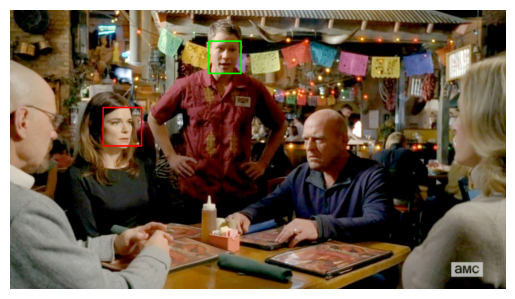

In [6]:
result = np.copy(img)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  
faces_dlib_img = []

# Draw rectangles around each detected face
for i, rect in enumerate(rects):
    x, y, w, h = convert_and_trim_bb(img, rect)
    color = colors[i % len(colors)]  # Select color from the color list

    cv2.rectangle(result, (x, y), (x+w, y+h), color, 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    
plt.imshow(result)
plt.axis('off')
plt.show()

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

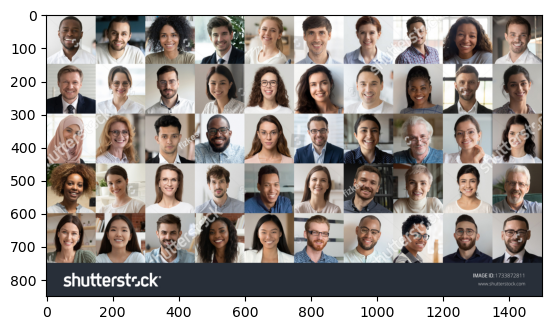

In [7]:
img = cv2.imread('../data/many-faces.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

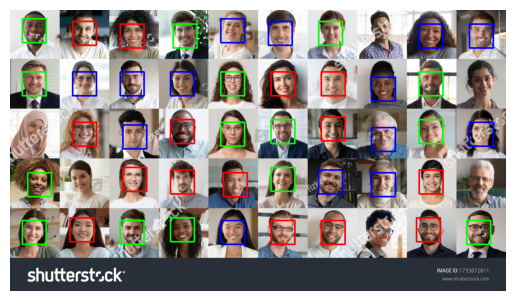

In [8]:
detector = dlib.get_frontal_face_detector()
rects = detector(img_gray)

result = np.copy(img)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  
faces_dlib_img = []

# Draw rectangles around each detected face
for i, rect in enumerate(rects):
    x, y, w, h = convert_and_trim_bb(img, rect)
    color = colors[i % len(colors)]  # Select color from the color list

    cv2.rectangle(result, (x, y), (x+w, y+h), color, 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    
plt.imshow(result)
plt.axis('off')
plt.show()